In [30]:
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg')
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv("train.csv")
filtered_data = data[data["sign"] == "puzzle"]
csv_path = "filter_for_word.csv"
filtered_data.to_csv(csv_path, index=False)

In [20]:
"""One file path""" 
data_total = np.zeros((1, 543, 8))

def extract_descriptors(data_train):
    data_train_descriptor = np.zeros((1, 543, 8))
    for i in range(0,543):
        d1 = np.mean(data_train[i, :, 0])
        d2 = np.mean(data_train[i, :, 1])
        d3 = np.max(data_train[i, :, 0])
        d4 = np.max(data_train[i, :, 1])
        d5 = np.min(data_train[i, :, 0])
        d6 = np.min(data_train[i, :, 1])
        d7 = np.sum(np.square(data_train[i, :, 0]))
        d8 = np.sum(np.square(data_train[i, :, 1]))
        data_train_descriptor[:, i, :] = [d1, d2, d3, d4, d5, d6, d7, d8]
    return data_train_descriptor
    
for i in range(filtered_data.shape[0]):
    path_one_file = filtered_data.iloc[i]["path"]
    test = pd.read_parquet(path_one_file)
    cleaned_data = test[["frame", "landmark_index", "x", "y"]]
    num_samples = cleaned_data["frame"].nunique()
    cleaned_data = cleaned_data[["frame", "landmark_index", "x", "y"]].to_numpy()
    cleaned_data = cleaned_data.reshape(543, num_samples, 4)

    data_with_descriptors = extract_descriptors(cleaned_data)
    data_total = np.append(data_total, data_with_descriptors, axis=0)

(1, 543, 8)


AttributeError: Line2D.set() got an unexpected keyword argument 'block'

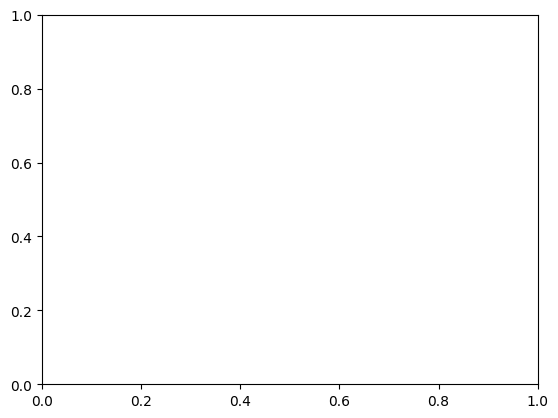

In [31]:
path_one_file = filtered_data.iloc[1]["path"]
test = pd.read_parquet(path_one_file)
cleaned_data = test[["frame", "landmark_index", "x", "y"]]
num_samples = cleaned_data["frame"].nunique()
cleaned_data = cleaned_data[["frame", "landmark_index", "x", "y"]].to_numpy()
cleaned_data = cleaned_data.reshape(543, num_samples, 4)
pruebagrafica=extract_descriptors(cleaned_data)
print(pruebagrafica.shape)

plt.plot(pruebagrafica[0,:,0],pruebagrafica[0,:,1], block=False)

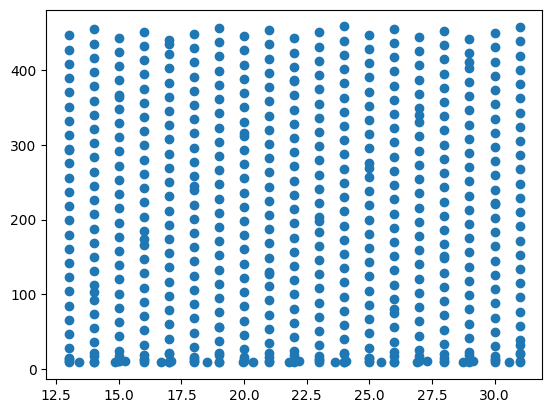

In [22]:
""" visualizar datos"""

data_descriptors_rendering = np.load("data_with_descriptors_puzzle.npy")

plt.plot(data_descriptors_rendering[1, :, 0], data_descriptors_rendering[1, :, 1], 'o')
